<a href="https://colab.research.google.com/github/Saranya003/INSAID_TASK/blob/main/INSAID_TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fraudulent Transactions for a Financial Company**

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

**IMPORT LIBERARY**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**READ THE DATASET**

In [54]:
df=pd.read_csv('Fraud.csv')
df.shape

(409488, 11)

In [ ]:
df.head(5)

**CHECK FOR NULL VALUES**

In [56]:
df.isnull().values.any()

True

In [57]:
df.isnull().sum()

step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

Missing values can be handled by deleting the rows or columns having null values. If columns have more than half of the rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped.

In [58]:
df.dropna(inplace=True)
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409487 entries, 0 to 409486
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            409487 non-null  int64  
 1   type            409487 non-null  object 
 2   amount          409487 non-null  float64
 3   nameOrig        409487 non-null  object 
 4   oldbalanceOrg   409487 non-null  float64
 5   newbalanceOrig  409487 non-null  float64
 6   nameDest        409487 non-null  object 
 7   oldbalanceDest  409487 non-null  float64
 8   newbalanceDest  409487 non-null  float64
 9   isFraud         409487 non-null  float64
 10  isFlaggedFraud  409487 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 37.5+ MB


In [ ]:
df.describe()

In [61]:
iqr = df['step'].quantile(0.75) - df['step'].quantile(0.25)
upper_threshold = df['step'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['step'].quantile(0.25) - (1.5 * iqr)
lower_threshold,upper_threshold

(1.0, 25.0)

In [ ]:
import plotly.express as px
from matplotlib.pyplot import figure

#sns.boxplot(dataset['store'])
fig = px.box(df["step"])
fig.show()

AS WE OBSERVED THE GRAPH THEIR IS OUTLIERS IN THE STEP NEED TO CLIP

In [ ]:
df['step'] = df['step'].clip(upper_threshold,lower_threshold)
df.step
fig = px.box(df["step"])
fig.show()

AFTER CLIPPING NO OUTLIERS FOUND

In [64]:
iqr = df['amount'].quantile(0.75) - df['amount'].quantile(0.25)
upper_threshold = df['amount'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['amount'].quantile(0.25) - (1.5 * iqr)
lower_threshold,upper_threshold

(-310512.2774999999, 553466.3424999999)

In [ ]:
fig = px.box(df["step"])
fig.show()

AS WE OBSERVED THE GRAPH THEIR IS NO OUTLIERS

In [66]:

iqr = df['oldbalanceOrg'].quantile(0.75) - df['oldbalanceOrg'].quantile(0.25)
upper_threshold = df['oldbalanceOrg'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['oldbalanceOrg'].quantile(0.25) - (1.5 * iqr)
lower_threshold,upper_threshold

(-261819.52500000002, 436365.875)

In [ ]:
fig = px.box(df["oldbalanceOrg"])
fig.show()

AS WE OBSERVED THE GRAPH THEIR IS OUTLIERS  NEED TO CLIP

In [ ]:
df['oldbalanceOrg'] = df['oldbalanceOrg'].clip(upper_threshold,lower_threshold)
df.oldbalanceOrg
fig = px.box(df["oldbalanceOrg"])
fig.show()

AFTER CLIPPING NO OUTLIERS FOUND

In [ ]:
iqr = df['newbalanceOrig'].quantile(0.75) - df['newbalanceOrig'].quantile(0.25)
upper_threshold = df['newbalanceOrig'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['newbalanceOrig'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold,upper_threshold)
#Graph
fig = px.box(df["newbalanceOrig"])
fig.show()


AS WE OBSERVED THE GRAPH THEIR IS OUTLIERS NEED TO CLIP

In [ ]:
df['newbalanceOrig'] = df['newbalanceOrig'].clip(upper_threshold,lower_threshold)
df.newbalanceOrig
fig = px.box(df["newbalanceOrig"])
fig.show()

AFTER CLIPPING NO OUTLIERS FOUND

In [ ]:
iqr = df['oldbalanceDest'].quantile(0.75) - df['oldbalanceDest'].quantile(0.25)
upper_threshold = df['oldbalanceDest'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['oldbalanceDest'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold,upper_threshold)
#Graph
fig = px.box(df["oldbalanceDest"])
fig.show()

AS WE OBSERVED THE GRAPH THEIR IS OUTLIERS NEED TO CLIP

In [ ]:
df['oldbalanceDest'] = df['oldbalanceDest'].clip(upper_threshold,lower_threshold)
df.oldbalanceDest
fig = px.box(df["oldbalanceDest"])
fig.show()

AFTER CLIPPING NO OUTLIERS FOUND

In [ ]:
iqr = df['newbalanceDest'].quantile(0.75) - df['newbalanceDest'].quantile(0.25)
upper_threshold = df['newbalanceDest'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['newbalanceDest'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold,upper_threshold)
#Graph
fig = px.box(df["newbalanceDest"])
fig.show()

AS WE OBSERVED THE GRAPH THEIR IS OUTLIERS NEED TO CLIP

In [ ]:
df['newbalanceDest'] = df['newbalanceDest'].clip(upper_threshold,lower_threshold)
df.newbalanceDest
fig = px.box(df["newbalanceDest"])
fig.show()

AFTER CLIPPING NO OUTLIERS FOUND

In [ ]:
iqr = df['isFraud'].quantile(0.75) - df['isFraud'].quantile(0.25)
upper_threshold = df['isFraud'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['isFraud'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold,upper_threshold)
#Graph
fig = px.box(df["isFraud"])
fig.show()

AS WE OBSERVED THE GRAPH THEIR IS OUTLIERS NEED TO CLIP

In [ ]:
df['isFraud'] = df['isFraud'].clip(upper_threshold,lower_threshold)
df.isFraud
fig = px.box(df["isFraud"])
fig.show()


AFTER CLIPPING NO OUTLIERS FOUND

In [ ]:
iqr = df['isFlaggedFraud'].quantile(0.75) - df['isFlaggedFraud'].quantile(0.25)
upper_threshold = df['isFlaggedFraud'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['isFlaggedFraud'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold,upper_threshold)
#Graph
fig = px.box(df["isFlaggedFraud"])
fig.show()

AS WE OBSERVED THE GRAPH THEIR IS NO OUTLIERS NEED TO CLIP

In [78]:
frauds = len(df[df.isFraud == 1])
nonfrauds = len(df[df.isFraud == 0])
print("Number of Fraud transactions: ", frauds)
print("Number of NON Fraud transactions: ",nonfrauds )

Number of Fraud transactions:  0
Number of NON Fraud transactions:  409487


In [79]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
print("Number of Fraud transactions: ", fraud)
print("Number of NON Fraud transactions: ",legit )


Number of Fraud transactions:  0
Number of NON Fraud transactions:  409487


In [80]:
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Percentage of Legit transactions: 100.0000 %
Percentage of Fraud transactions: 0.0000 %


In [ ]:
df1 = df[df['nameDest'].str.contains("M")==False].copy()
df1 = df1.drop(df1.columns[[3, 6]], axis = 1)
df1

In [82]:
#Evaluating the null values
df1.isnull().values.any()

False

In [83]:
print(df1.type.unique())

['TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [ ]:
columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for i in columns:
    df2 = df1.groupby(i).size()
    x = df2.index
    y = df2.values
    plt.plot(x, y)
    plt.xlabel(i)
    plt.show()

In [86]:
#Encoding the categorical column 'type'
type_encoding = { i : j for j,i in enumerate(df1['type'].unique())}

df1['type'].replace(type_encoding, inplace = True)
df1.head(15)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,0,181.00,181.00,0.00,0.0,0.000000e+00,0.0,0.0
3,1,1,181.00,181.00,0.00,21182.0,0.000000e+00,0.0,0.0
9,1,2,5337.77,41720.00,36382.23,41898.0,4.034879e+04,0.0,0.0
10,1,2,9644.94,4465.00,0.00,10845.0,1.579821e+05,0.0,0.0
15,1,1,229133.94,15325.00,0.00,5083.0,5.151344e+04,0.0,0.0
19,1,0,215310.30,705.00,0.00,22425.0,0.000000e+00,0.0,0.0
21,1,2,9302.79,11299.00,1996.21,29832.0,1.689670e+04,0.0,0.0
22,1,2,1065.41,1817.00,751.59,10330.0,0.000000e+00,0.0,0.0
24,1,0,311685.89,10835.00,0.00,6267.0,2.719173e+06,0.0,0.0
41,1,2,5758.59,32604.00,26845.41,209699.0,1.699722e+04,0.0,0.0


<Axes: >

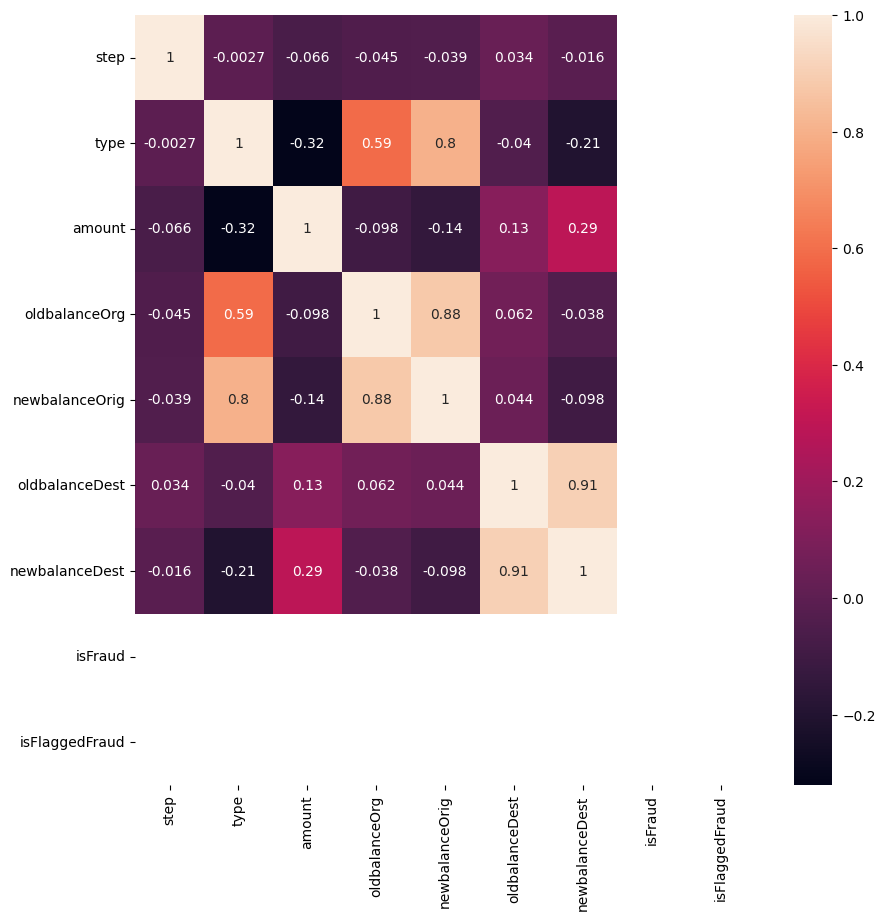

In [87]:
#Check for Multi-collinearity

corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True)

In [88]:
df1.drop(['oldbalanceOrg', 'oldbalanceDest'], axis=1, inplace=True)

In [89]:
df1.head(15)

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud
2,1,0,181.00,0.00,0.000000e+00,0.0,0.0
3,1,1,181.00,0.00,0.000000e+00,0.0,0.0
9,1,2,5337.77,36382.23,4.034879e+04,0.0,0.0
10,1,2,9644.94,0.00,1.579821e+05,0.0,0.0
15,1,1,229133.94,0.00,5.151344e+04,0.0,0.0
19,1,0,215310.30,0.00,0.000000e+00,0.0,0.0
21,1,2,9302.79,1996.21,1.689670e+04,0.0,0.0
22,1,2,1065.41,751.59,0.000000e+00,0.0,0.0
24,1,0,311685.89,0.00,2.719173e+06,0.0,0.0
41,1,2,5758.59,26845.41,1.699722e+04,0.0,0.0


In [90]:
#Train-Test split dataset
x = df1.drop(['isFraud', 'isFlaggedFraud'], axis=1).values
y = df1['isFraud']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [91]:
#Training a DecisionTree for our data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
print("DecisionTreeClassifier Accuracy Score = ", accuracy_score(y_test, y_pred))

DecisionTreeClassifier Accuracy Score =  1.0


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
y_pred = dtc.predict(x_test)
print(confusion_matrix(y_test, y_pred, labels=[1,0]))
print(classification_report(y_test, y_pred, labels=[1,0]))

print("DecisionTreeClassifier F1 Score = ", f1_score(y_test, y_pred))

In [93]:
feature_names       = ['step','type','amount','newbalanceOrg','newbalanceDest']
features_importance = list(dtc.feature_importances_)

result  = pd.DataFrame()

result['column_name'       ] = feature_names
result['feature_importance'] = features_importance

print(result)

      column_name  feature_importance
0            step                 0.0
1            type                 0.0
2          amount                 0.0
3   newbalanceOrg                 0.0
4  newbalanceDest                 0.0


##1.Describe your fraud detection model in elaboration.
 The dataset had no null values. Missing values were the Merchants and hence nameDest starting with 'M' were removed initially. Outliers were the balance figures of the accounts and they are important to detect fraud in the machine so we cannot interpret and remove the outliers. Multi-collinearity was removed by first cehcking the correlation matrix and then removing the respective columns.

##2. Describe your fraud detection model in elaboration 
I have used the Decision Tree Classifier as they are most commonly used for fraud detection by the companies, where the input data contained steps, type, amount, newbalanceOrg and newbalanceDest as the columns and the output was a (0,1), 0 being not fraud and 1 being fraud transaction

##3. How did you select variables to be included in the model?
 First was removal of unncessary columns like nameOrig and nameDest then later any row tih nameDest starting with 'M' was also removed, and after checking for collinearity then two more columns were removed. And rest were included in the data, we just encoded the type variable as it was a categorical column and we encoded it into a numerical column.

##4. Demonstrate the performance of model by using best set of tools. 
In the end we used accuracy score, confusion matrix and f1 score as the final evaluation for the performance of our model.

## 5. What are the key factors that predict fradulent customer? 
We can say that the transaction type is the major keyfactor, followed by newbalanceDest and also the amount of transaction can be used.

##6. Do these factors make sense? If yes, how? If not, how not?
 The factors do make sense as we saw that only CASH_OUT & TRANSFER contained fraud transaction.

## 7. What kind of prevention should be adopted while company update its infrastructure? 
If a single fraud is detected then nameDest should be stored for future uses. Both ends of transactions must be verified and balance must be checked at the end of the transaction. Type of transaction is the basic base condition for rolling out major transaction frauds.

## 8. Assuming these actions have been implemented, how would you determine if they work?
 We will run the new data collected from the transaction through our model and check for the accuracy and constantly update our model, implying that we are constantly updating our model and are aware of the accuracy of the same